In [17]:
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
# Plots
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# Model
from sklearn.neighbors import KNeighborsClassifier # To model the KNN classifier
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean andscaling to unit variance
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().values.any()

False

In [7]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [10]:
# Checking split of data
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index)) * 100))

X training data size: (537, 8)
y training data size: (537,)
X testing data size: (231, 8)
y testing data size: (231,)
69.92% of data is in training set
30.08% of data is in test set


# K-Nearest Neighbour classifier

In [11]:
# Creating number list from range 1 to 20 of K for KNN with X_train, X_test, y_train, y_test
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

In [12]:
# Declaring an empty list that will hold the accuracy scores
ac_scores = []

In [18]:
# performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)

In [19]:
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

In [20]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [21]:
print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.7575757575757576, 0.7359307359307359, 0.7705627705627706, 0.7619047619047619, 0.7489177489177489, 0.7662337662337663, 0.7748917748917749, 0.7878787878787878, 0.7878787878787878, 0.7705627705627706]

Misclassification error :
 [0.24242424242424243, 0.2640692640692641, 0.22943722943722944, 0.23809523809523814, 0.25108225108225113, 0.23376623376623373, 0.22510822510822515, 0.21212121212121215, 0.21212121212121215, 0.22943722943722944]

The optimal number of neighbor is k= 15


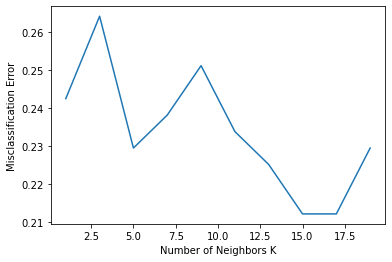

In [22]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [23]:
# Model building using X_train, X_test, y_train, y_test with obtained optimal_k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

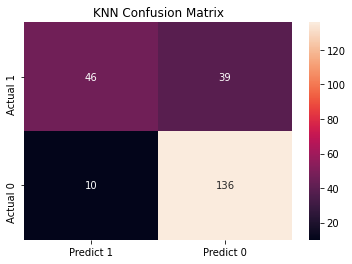

In [24]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('KNN Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

In [26]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.7879


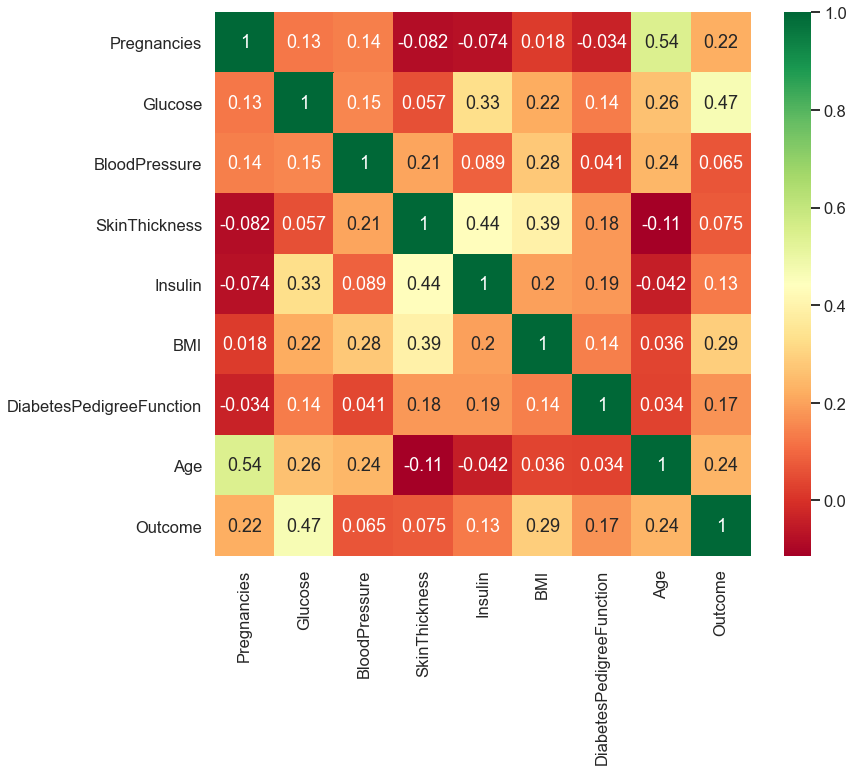

In [76]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# Logistic Regression

In [27]:
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import model_selection # Sklearn package to evaluate a score by cross-validation
# Model
from sklearn.linear_model import LogisticRegression # To model the Logistic regression classifier
# Cross Validation
from sklearn.model_selection import KFold # Splits dataset into k consecutive folds
from sklearn.model_selection import cross_val_score # Evaluates a score by cross-validation
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set

In [28]:
# Model building
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

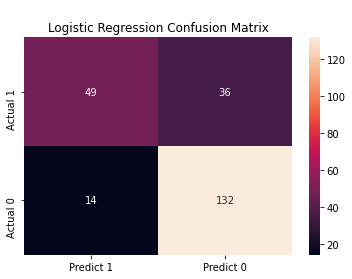

In [29]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, log_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nLogistic Regression Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

In [30]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('\nClassification accuracy: {0:0.4f}'.format(classification_accuracy))


Classification accuracy: 0.7835


# K-fold cross validation

In [45]:
# K-fold Cross Validation
num_folds =10 # Split dataset into 10 consecutive folds
kfold = KFold(n_splits=num_folds)

In [46]:
# Cross validation
model = LogisticRegression()
results = cross_val_score(model,X,y, cv=kfold)
print('\nAccuracy of each fold:',results)
print("\nAccuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy of each fold: [0.7012987  0.80519481 0.75324675 0.68831169 0.76623377 0.74025974
 0.85714286 0.81818182 0.73684211 0.80263158]

Accuracy: 76.693% (5.079%)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Replace strings with an integer
        df.head(10)

In [35]:
# Build the model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [36]:
# Score
print('Training score:', dTree.score(X_train, y_train))
print('Test score:', dTree.score(X_test, y_test))

Training score: 1.0
Test score: 0.6883116883116883


In [37]:
# Visualizing the tree
from sklearn.tree import export_graphviz
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names
= list(train_char_label))
Credit_Tree_File.close()

In [38]:
from os import system
from IPython.display import Image

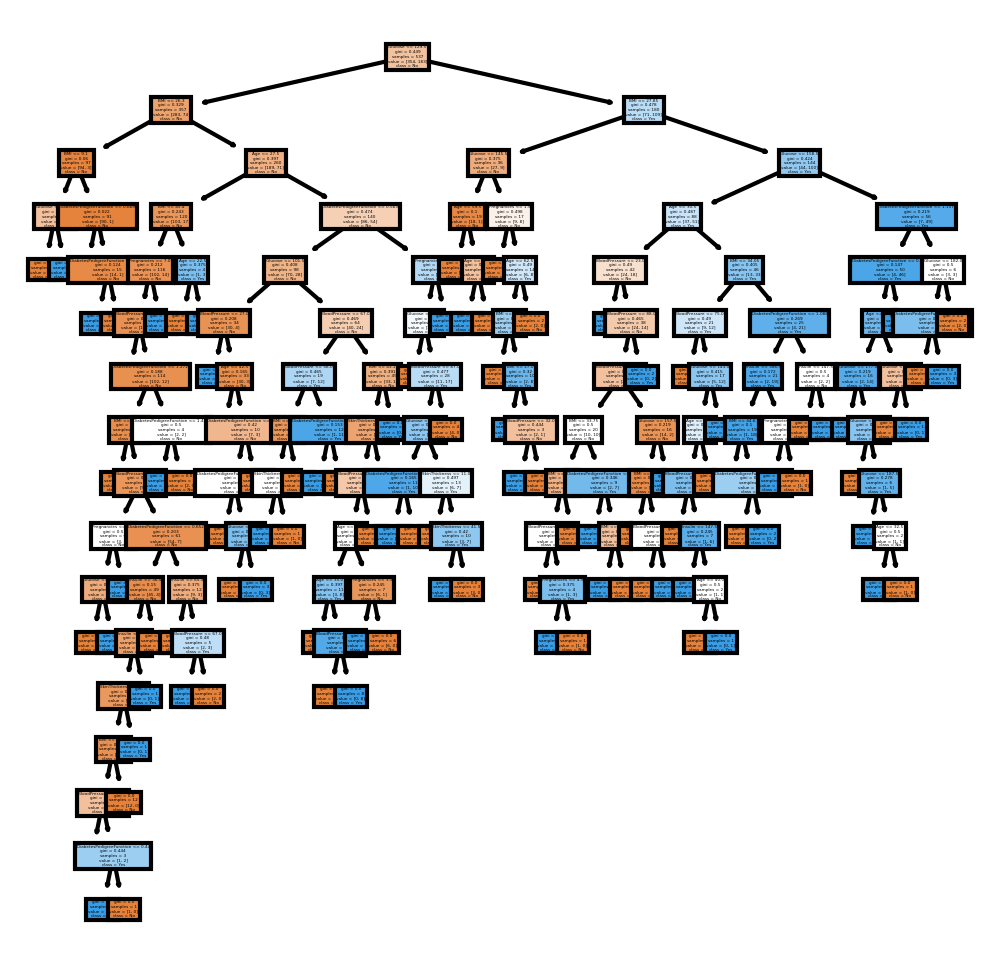

In [40]:
from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)
fig.savefig('tree.png')

In [44]:
# Feature importance
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Pregnancies               0.050616
Glucose                   0.286047
BloodPressure             0.168084
SkinThickness             0.048001
Insulin                   0.032465
BMI                       0.175812
DiabetesPedigreeFunction  0.118873
Age                       0.120103


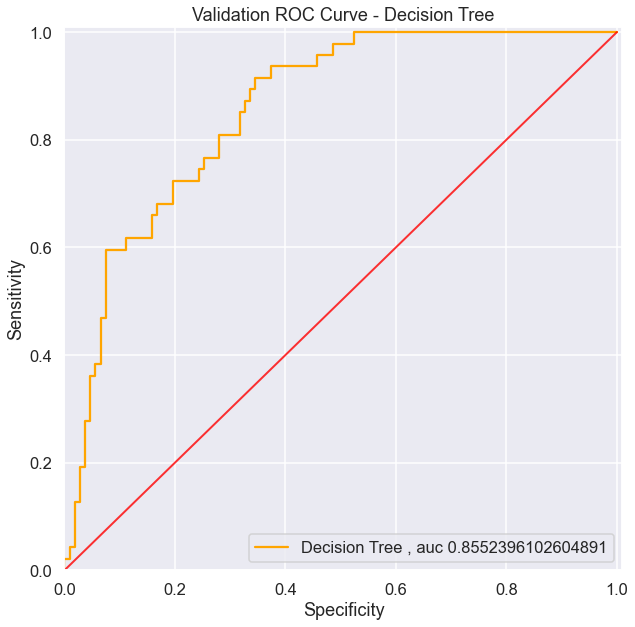

In [70]:
y_predNB_proba = NB.predict_proba(x_testNB)[::,1]
fprNB, tprNB, _ = metrics.roc_curve(y_testNB, y_predNB_proba)
aucNB =  metrics.roc_auc_score(y_testNB, y_predNB_proba)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(fprNB, tprNB, label = "Decision Tree , auc " + str(aucNB), color="orange")
plt.plot([0,1],[0,1],alpha=0.8,lw=2, color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve - Decision Tree")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

In [59]:
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import classification_report

In [60]:
x = df[['Pregnancies','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y = df.iloc[::,-1]

In [62]:
x_trainNB, x_testNB, y_trainNB, y_testNB = train_test_split(x,y,test_size=0.2,random_state=0)
scalerNB = StandardScaler()
x_trainNB = scalerNB.fit_transform(x_trainNB)
x_testNB = scalerNB.transform(x_testNB)
NB = GaussianNB()
NB.fit(x_trainNB,y_trainNB)

GaussianNB()

In [63]:
y_predNB = NB.predict(x_testNB)
pd.DataFrame({"Actual_Outcome":y_testNB, "Predicted_Outcome":y_predNB})

,Actual_Outcome,Predicted_Outcome
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [64]:
reportNB = pd.DataFrame(classification_report(y_testNB, y_predNB, output_dict=True)).transpose()
reportNB

,precision,recall,f1-score,support
0,0.837838,0.869159,0.853211,107.000000
1,0.674419,0.617021,0.644444,47.000000
accuracy,0.792208,0.792208,0.792208,0.792208
macro avg,0.756128,0.743090,0.748828,154.000000
weighted avg,0.787963,0.792208,0.789497,154.000000


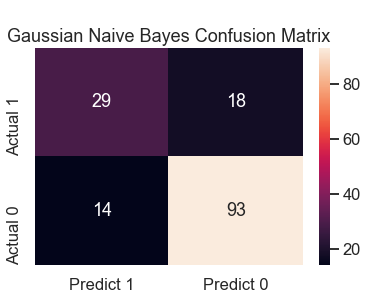

In [83]:
# Confusion matrix
cm=metrics.confusion_matrix(y_testNB, y_predNB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nGaussian Naive Bayes Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

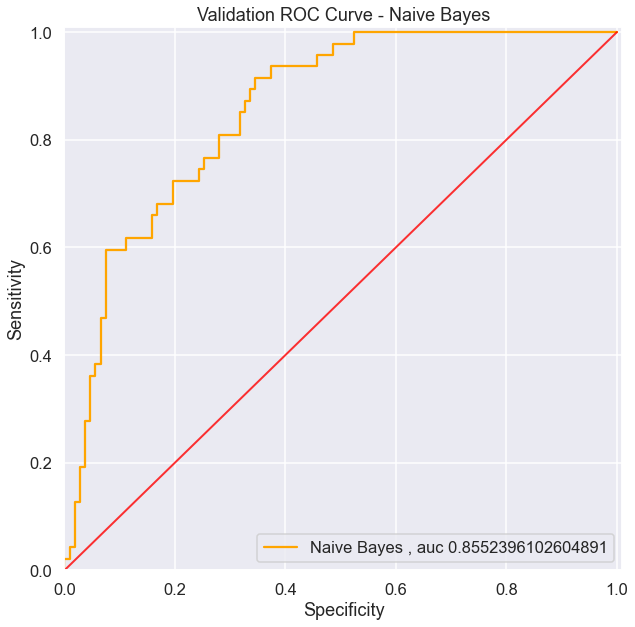

In [65]:
y_predNB_proba = NB.predict_proba(x_testNB)[::,1]
fprNB, tprNB, _ = metrics.roc_curve(y_testNB, y_predNB_proba)
aucNB =  metrics.roc_auc_score(y_testNB, y_predNB_proba)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(fprNB, tprNB, label = "Naive Bayes , auc " + str(aucNB), color="orange")
plt.plot([0,1],[0,1],alpha=0.8,lw=2, color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve - Naive Bayes")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


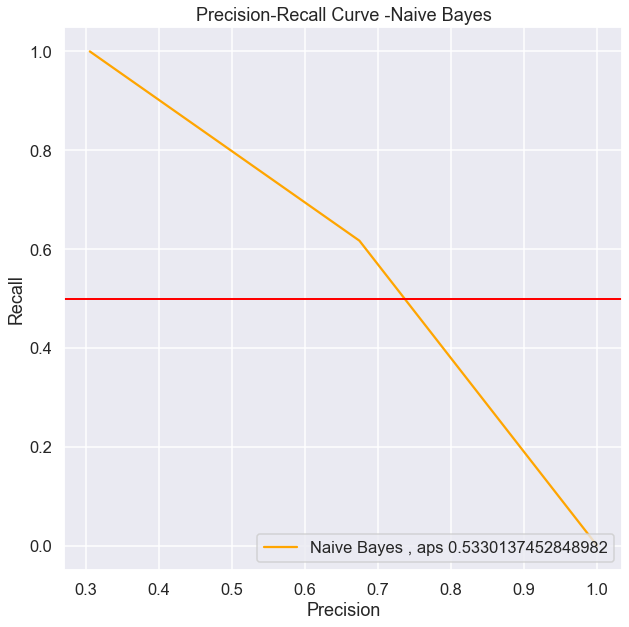

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precisionrecallNB,recallNB,thresholdNB = precision_recall_curve(y_testNB,y_predNB)
apsNB = average_precision_score(y_testNB,y_predNB)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(precisionrecallNB,recallNB, label = "Naive Bayes , aps " + str(apsNB), color="orange")
plt.title("Precision-Recall Curve -Naive Bayes")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.axhline(y=0.5, color="red", lw=2)
plt.show()

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [78]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [79]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9466666666666667


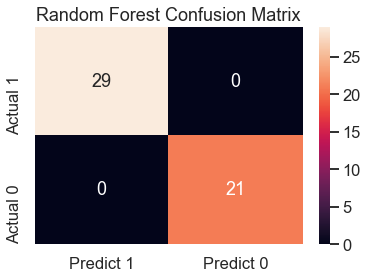

In [81]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Random Forest Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');